In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
np.random.seed(0)

In [51]:
ranValues = np.random.rand(1000000).tolist()

In [52]:
#Ejercicio 1
def shierpinski(x, y, randomValues):
    p1, p2, p3 = 0.33, 0.33, 0.33
    for i in range(len(randomValues)):
        if (randomValues[i] < p1):
            x.append(x[i]/2)
            y.append(y[i]/2)
        elif (randomValues[i] < p2 + p1):
            x.append(x[i]/2 + 0.5)
            y.append(y[i]/2)
        else:
            x.append(x[i]/2 + 0.25)
            y.append(y[i]/2 + 0.5)
    return x, y

In [53]:
x, y = shierpinski([0],[0], ranValues)

In [54]:
plt.rcParams['figure.figsize'] = [10, 8]

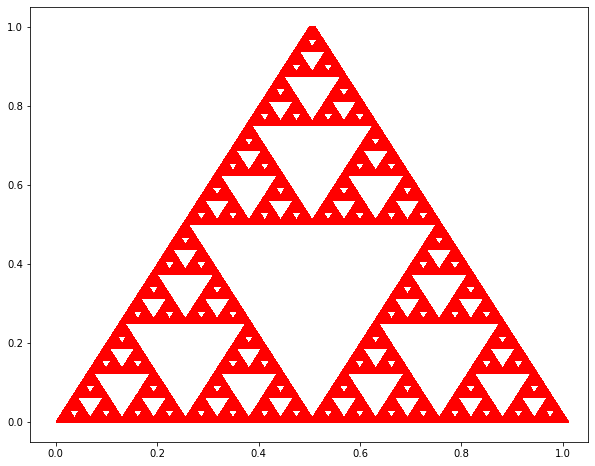

In [55]:
plt.scatter(x, y, marker=1, color="red")

In [56]:
#Ejercicio 2
def barnsley(x, y, randomValues):
    for i in range(len(randomValues)):
        if (randomValues[i] < 0.85):
            x.append(x[i]*0.85 + y[i]*0.04)
            y.append(x[i]*-0.04 + y[i]*0.85 + 1.6)
        elif (randomValues[i] < 0.92):
            x.append(x[i]*-0.15 + y[i]*0.28)
            y.append(x[i]*0.26 + y[i]*0.24 + 0.44)
        elif (randomValues[i] < 0.99):
            x.append(x[i]*0.2 + y[i]*-0.26)
            y.append(x[i]*0.23 + y[i]*0.22 + 1.6)
        else:
            x.append(0)
            y.append(y[i]*0.16)
    return x, y

In [57]:
x, y = barnsley([0],[0], ranValues)

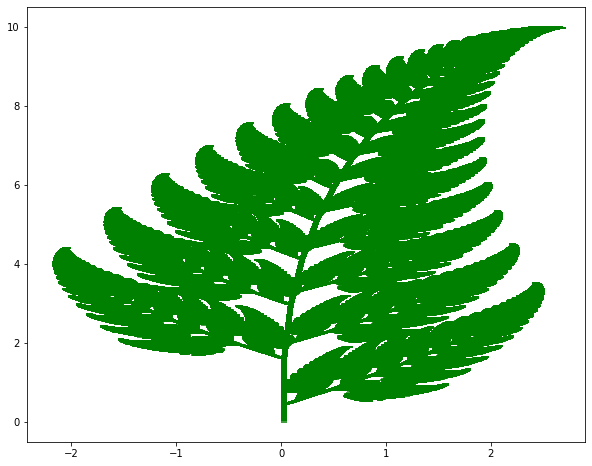

In [58]:
plt.scatter(x, y, marker=1, color="green")

In [59]:
#Ejercicio 3
def g1(n, x0 = 0):
    x = [x0]
    for i in range(n):
        x.append((5**5)*x[i] % ((2**35)-1))
        x[i] = x[i] / ((2**35)-1)
    return x

In [60]:
def g2(n, x0 = 0):
    x = [x0]
    for i in range(n):
        x.append((7**5)*x[i] % ((2**31)-1))
        x[i] = x[i] / ((2**31)-1)
    return x

In [61]:
def barra(n):
    s = ""
    for i in range(n):
       s = s + '*'  
    return s

In [62]:
def histogramas(ln):
    intervalos = []
    intervalos = np.zeros(10).tolist()
    for i in ln:
        if (i <= 0.1):
            intervalos[0] += 1
        elif (i <= 0.2):
            intervalos[1] += 1
        elif (i <= 0.3):
            intervalos[2] += 1
        elif (i <= 0.4):
            intervalos[3] += 1
        elif (i <= 0.5):
            intervalos[4] += 1
        elif (i <= 0.6):
            intervalos[5] += 1
        elif (i <= 0.7):
            intervalos[6] += 1
        elif (i <= 0.8):
            intervalos[7] += 1
        elif (i <= 0.9):
            intervalos[8] += 1
        elif (i <= 1):
            intervalos[9] += 1
    total = np.sum(intervalos)
    intervalosp = []
    for i in range(len(intervalos)):
        intervalosp.append(intervalos[i]/total)
        print((i/10),(i+1)/10,":",barra((int)(intervalosp[i] * 500 //1)),intervalos[i], round(intervalosp[i] * 100,2) ,"%")
    
    

In [63]:
g1n = g1(100, 1)

In [64]:
g2n = g2(100, 1)

In [65]:
histogramas(g1n)
#La distribucion no es necesariamente uniforme pero puede intuirse que tiende a una uniforme

0.0 0.1 : ********************************************* 9.0 9.0 %
0.1 0.2 : ********************************************* 9.0 9.0 %
0.2 0.3 : ******************************************************* 11.0 11.0 %
0.3 0.4 : ******************************************************* 11.0 11.0 %
0.4 0.5 : ******************************************************* 11.0 11.0 %
0.5 0.6 : *********************************** 7.0 7.0 %
0.6 0.7 : *********************************** 7.0 7.0 %
0.7 0.8 : ************************************************** 10.0 10.0 %
0.8 0.9 : ***************************************************************** 13.0 13.0 %
0.9 1.0 : ************************************************************ 12.0 12.0 %


In [66]:
histogramas(g2n)
#La distribucon no parece ser uniforme, esta es la que menos uniforme se ve

0.0 0.1 : *************************************************************************** 15.0 15.0 %
0.1 0.2 : *************** 3.0 3.0 %
0.2 0.3 : ************************************************** 10.0 10.0 %
0.3 0.4 : ********************************************* 9.0 9.0 %
0.4 0.5 : ********************************************* 9.0 9.0 %
0.5 0.6 : ******************************************************* 11.0 11.0 %
0.6 0.7 : ************************************************** 10.0 10.0 %
0.7 0.8 : ************************************************************ 12.0 12.0 %
0.8 0.9 : ********************************************* 9.0 9.0 %
0.9 1.0 : ************************************************************ 12.0 12.0 %


In [67]:
histogramas(np.random.rand(100).tolist())
#La distribucion no es necesariamente uniforme pero puede intuirse que tiende a una uniforme
#Matematicamente hablando esto tiene sentido para las 3 muestras, pues 100 es un numero bastante alejado de el concepto de infinitos datos que representarian la distribucion continua, al aumentar los numeros la distribucion deberia verse mas uniforme

0.0 0.1 : ************************************************************ 12.0 12.0 %
0.1 0.2 : ******************************************************* 11.0 11.0 %
0.2 0.3 : ********************************************************************** 14.0 14.0 %
0.3 0.4 : **************************************** 8.0 8.0 %
0.4 0.5 : ************************************************************ 12.0 12.0 %
0.5 0.6 : ******************************************************* 11.0 11.0 %
0.6 0.7 : ************************************************** 10.0 10.0 %
0.7 0.8 : **************************************** 8.0 8.0 %
0.8 0.9 : ********************************************* 9.0 9.0 %
0.9 1.0 : ************************* 5.0 5.0 %


In [68]:
g1n = g1(5000, 1)

In [69]:
g2n = g2(5000, 1)

In [70]:
histogramas(g1n)
#La distribucion es mas uniforme que en el inciso anterior

0.0 0.1 : *************************************************** 510.0 10.2 %
0.1 0.2 : ************************************************** 507.0 10.14 %
0.2 0.3 : *********************************************** 474.0 9.48 %
0.3 0.4 : ********************************************** 467.0 9.34 %
0.4 0.5 : ************************************************** 505.0 10.1 %
0.5 0.6 : *************************************************** 513.0 10.26 %
0.6 0.7 : ************************************************* 496.0 9.92 %
0.7 0.8 : ************************************************* 490.0 9.8 %
0.8 0.9 : **************************************************** 520.0 10.4 %
0.9 1.0 : *************************************************** 518.0 10.36 %


In [71]:
histogramas(g2n)
#La distribucion es mas uniforme que en el inciso anterior

0.0 0.1 : *********************************************** 477.0 9.54 %
0.1 0.2 : *************************************************** 517.0 10.34 %
0.2 0.3 : ************************************************** 503.0 10.06 %
0.3 0.4 : ************************************************ 482.0 9.64 %
0.4 0.5 : **************************************************** 525.0 10.5 %
0.5 0.6 : ***************************************************** 534.0 10.68 %
0.6 0.7 : ************************************************* 492.0 9.84 %
0.7 0.8 : ************************************************ 481.0 9.62 %
0.8 0.9 : ************************************************* 498.0 9.96 %
0.9 1.0 : ************************************************* 491.0 9.82 %


In [72]:
histogramas(np.random.rand(5000).tolist())
#La distribucion es mas uniforme que en el inciso anterior

0.0 0.1 : ************************************************* 490.0 9.8 %
0.1 0.2 : ********************************************** 469.0 9.38 %
0.2 0.3 : *************************************************** 518.0 10.36 %
0.3 0.4 : ************************************************** 500.0 10.0 %
0.4 0.5 : *************************************************** 512.0 10.24 %
0.5 0.6 : **************************************************** 525.0 10.5 %
0.6 0.7 : ************************************************* 490.0 9.8 %
0.7 0.8 : ************************************************* 495.0 9.9 %
0.8 0.9 : *************************************************** 516.0 10.32 %
0.9 1.0 : ************************************************ 485.0 9.7 %


In [73]:
g1n = g1(100000, 1)

In [74]:
g2n = g2(100000, 1)

In [75]:
histogramas(g1n)

0.0 0.1 : ************************************************* 9863.0 9.86 %
0.1 0.2 : ************************************************** 10053.0 10.05 %
0.2 0.3 : *********************************************** 9595.0 9.59 %
0.3 0.4 : ************************************************ 9783.0 9.78 %
0.4 0.5 : *************************************************** 10293.0 10.29 %
0.5 0.6 : ************************************************** 10130.0 10.13 %
0.6 0.7 : ************************************************** 10105.0 10.1 %
0.7 0.8 : ************************************************* 9803.0 9.8 %
0.8 0.9 : *************************************************** 10268.0 10.27 %
0.9 1.0 : ************************************************** 10107.0 10.11 %


In [76]:
histogramas(g2n)

0.0 0.1 : ************************************************** 10047.0 10.05 %
0.1 0.2 : ************************************************** 10016.0 10.02 %
0.2 0.3 : ************************************************* 9863.0 9.86 %
0.3 0.4 : ************************************************* 9878.0 9.88 %
0.4 0.5 : ************************************************** 10012.0 10.01 %
0.5 0.6 : *************************************************** 10285.0 10.28 %
0.6 0.7 : ************************************************* 9931.0 9.93 %
0.7 0.8 : ************************************************* 9955.0 9.96 %
0.8 0.9 : ************************************************** 10118.0 10.12 %
0.9 1.0 : ************************************************* 9895.0 9.9 %


In [77]:
histogramas(np.random.rand(100000).tolist())
#Al correrlo para los tres generados, con un numero grande de valores, se pueden observar distribuciones practiamente uniformes para los tres casos

0.0 0.1 : ************************************************* 9933.0 9.93 %
0.1 0.2 : ************************************************** 10038.0 10.04 %
0.2 0.3 : ************************************************** 10093.0 10.09 %
0.3 0.4 : ************************************************* 9879.0 9.88 %
0.4 0.5 : ************************************************* 9864.0 9.86 %
0.5 0.6 : ************************************************** 10009.0 10.01 %
0.6 0.7 : ************************************************* 9982.0 9.98 %
0.7 0.8 : ************************************************** 10021.0 10.02 %
0.8 0.9 : ************************************************** 10089.0 10.09 %
0.9 1.0 : ************************************************** 10092.0 10.09 %


In [78]:
import math

In [79]:
#Ejercicio 4
def g(x):
    a=math.exp(-x**2)
    return a
#Se transforma la integral con la formula vista en clase cuando el limite es infinito 
def h(y):
    b=g((1/y)-1)/y**2
    return b
cant=[100,10000,1000000]
sum=0
vals=[]

for n in range(len(cant)):
    for i in range(cant[n]):
        sum=sum+h(np.random.random_sample())
    #note que la integral es par por lo que la integral de -infinito a infinito vale el doble que la de 0 a infinito, por esto el valor se multipica por dos
    e=2*sum/cant[n]
    vals.append(e)
print("Aplicando el metodo Montecarlo, con "+str(cant[0])+" iteraciones, la integral vale: "+str(vals[0])+".\n","Aplicando el metodo Montecarlo, con "+str(cant[1])+" iteraciones, la integral vale: "+str(vals[1])+". \n","Aplicando el metodo Montecarlo, con "+str(cant[2])+" iteraciones, la integral vale: "+str(vals[2])+".")


Aplicando el metodo Montecarlo, con 100 iteraciones, la integral vale: 1.9222343462613634.
 Aplicando el metodo Montecarlo, con 10000 iteraciones, la integral vale: 1.7985690096130886. 
 Aplicando el metodo Montecarlo, con 1000000 iteraciones, la integral vale: 1.788620970929356.


In [80]:
#Ejercicio 5
def f(x,y):
    a=math.exp(-(float(x)+float(y)))
    return a
#transformacion del limite de la primera integral (con respecto de y) con la transformacion vista en clase que se aplica cuando se tienen limites no infinitos
def h(x,y2):
    b=f(x,x*y2)*x
    return b
#transformacion del limite de la segunda integral (con respecto de x) con la transformacion vista en clase que se aplica cuando se tiene como limites 0 a infinito
def h2(x2,y2):
    c=h((1/x2)-1,y2)/x2**2
    return c
cant=[100,10000,1000000]
sum=0
vals=[]
for n in range(len(cant)):
    for i in range(cant[n]):
        sum=sum+h2(np.random.random_sample(),np.random.random_sample())
    e=sum/cant[n]
    vals.append(e)
print("Aplicando el metodo Montecarlo, con "+str(cant[0])+" iteraciones, la integral vale: "+str(vals[0])+".\n","Aplicando el metodo Montecarlo, con "+str(cant[1])+" iteraciones, la integral vale: "+str(vals[1])+". \n","Aplicando el metodo Montecarlo, con "+str(cant[2])+" iteraciones, la integral vale: "+str(vals[2])+".")


Aplicando el metodo Montecarlo, con 100 iteraciones, la integral vale: 0.4247272989810662.
 Aplicando el metodo Montecarlo, con 10000 iteraciones, la integral vale: 0.5029457816362556. 
 Aplicando el metodo Montecarlo, con 1000000 iteraciones, la integral vale: 0.5047558887932749.
